## Monitoria 1 - Econometría Básica
### Pontificia Universidad Javeriana
#### Introducción a Python

En este repositorio buscaremos dar una breve introducción a Python para el análisis de datos. Se abordara la importación de diferentes tipos de bases de datos, la creación de graficas y la personalización de estas, el calculo de estadísticas descriptivas, la importación de imágenes y la realización de regresiones usando el método de mínimos cuadrados ordinarios.

In [1]:
# Importamos las librerias basicas y creamos una carpeta para guardar las bases de datos 
# y otra para las graficas (en el caso de necesitarse).
import pandas as pd 
import numpy as np 
import os 

pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout) 
    pathgraphs = './graphs/'
    if not os.path.exists(pathgraphs): 
        os.mkdir(pathgraphs) 
        
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 
sns.set()


In [2]:
# Importamos la base de datos que esta en EXCEL
data1 = pd.read_excel(pathout + 'base1.xlsx')


In [ ]:
#Otros tipos de datos muy comunes serían datos .dta, .csv o .html. Estos los podemos importar de la siguiente manera:

# data1 = pd.read_csv(pathout + 'base1.csv')
# data1 = pd.read_dta(pathout + 'base1.dta')
# data1 = pd.read_html(pathout + 'base1.html')


In [3]:
data1

,Fecha,Inflación,Tasa de desempleo
0,2001-01-01,8.49,16.694680
1,2001-02-01,8.06,17.307023
2,2001-03-01,7.81,15.705056
3,2001-04-01,7.98,14.589864
4,2001-05-01,7.87,14.226299
...,...,...,...
230,2020-03-01,3.86,12.634106
231,2020-04-01,3.51,19.811142
232,2020-05-01,2.85,21.378492
233,2020-06-01,2.19,19.813177


In [4]:
# Cambiamos los nombres de las variables
data1.columns = ['Fecha', 'Inflacion', 'Desempleo']

In [5]:
data1

,Fecha,Inflacion,Desempleo
0,2001-01-01,8.49,16.694680
1,2001-02-01,8.06,17.307023
2,2001-03-01,7.81,15.705056
3,2001-04-01,7.98,14.589864
4,2001-05-01,7.87,14.226299
...,...,...,...
230,2020-03-01,3.86,12.634106
231,2020-04-01,3.51,19.811142
232,2020-05-01,2.85,21.378492
233,2020-06-01,2.19,19.813177


### Graficas:

La primera grafica que se nos vendría a la mente para el tipo de datos que tenemos (datos de series de tiempo) seria una grafica de línea, contra el tiempo.

In [6]:
#Librerias para las graficas
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.dates import DateFormatter, DayLocator

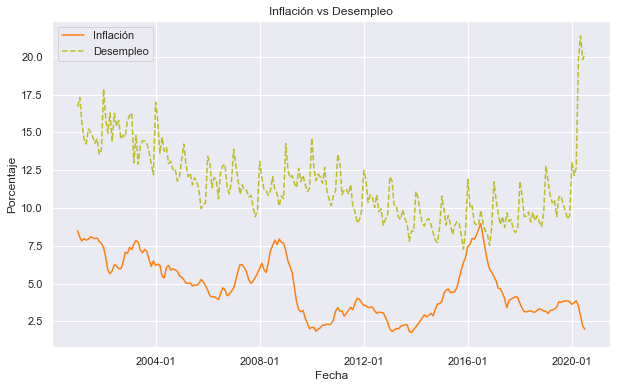

In [7]:
plt.rc('font', size=12)

#La figura se llamara ax
fig, ax = plt.subplots(figsize=(10, 6))

# Aca ponemos las variables a graficar, y algunos detalles de la grafica
ax.plot(data1.Fecha, data1.Inflacion, color='tab:orange', label='Inflación')
ax.plot(data1.Fecha, data1.Desempleo, color='tab:olive', linestyle='--',
        label='Desempleo')

# Poniendo nombres a los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Porcentaje')
ax.set_title('Inflación vs Desempleo')
ax.grid(True)
ax.legend(loc='upper left');


#ax.xaxis.set_major_formatter(DateFormatter('%y/%m')) Esta es otra forma de mostrar la fecha en el eje x
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

Al crear una grafica podemos editar los colores, el tipo de línea, la forma en la que se muestran los ejes, etc. 

- Un ejemplo de los colores que podemos usar es: blue, red, olive, orange, purple.
- Un ejemplo del tipo de línea que podemos usar es: dotted, dashdot, dashed.


In [8]:
#Si queremos quedarnos con datos del 2010 en adelante
post2010 = data1[data1.Fecha >= '2010-01-01']

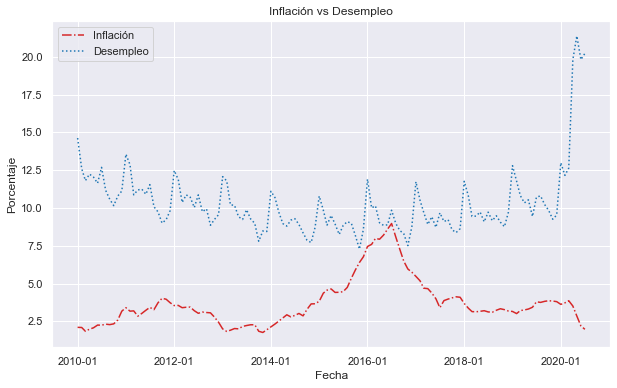

In [12]:
plt.rc('font', size=12)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(post2010.Fecha, post2010.Inflacion, color='tab:red', linestyle='dashdot' ,label='Inflación')
ax.plot(post2010.Fecha, post2010.Desempleo, color='tab:blue', linestyle='dotted',
        label='Desempleo')

ax.set_xlabel('Fecha')
ax.set_ylabel('Porcentaje')
ax.set_title('Inflación vs Desempleo')
ax.grid(True)
ax.legend(loc='upper left');

ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

Aunque las anteriores graficas son las mas comunes podríamos pensar en graficar un histograma y el Kernel, para ver como se distribuyen los datos.


<AxesSubplot:xlabel='Inflacion', ylabel='Density'>

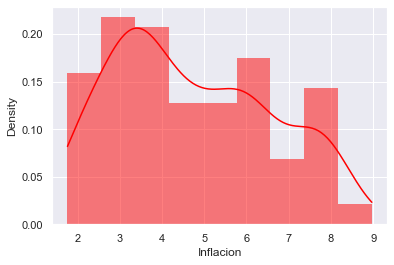

In [34]:
import seaborn as sns


sns.histplot(data1.Inflacion, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


Nótese que usamos una librería diferente para la grafica anterior. Para las primeras graficas usamos matplotlib y ahora usamos seaborn. La misma grafica podría hacerse con ambas librerías.

### Estadísticas descriptivas:
Para calcular las estadísticas descriptivas (media, desviación estándar, mediana, covarianza y correlación) podemos hacer dos cosas. Opción 1: guardar los datos en una variable y luego "imprimir el resultado" o opción 2: correr el comando y automáticamente se mostrara el resultado. Para este ejemplo guardaremos la estimación de la media, desviación, etc. en variables, y después con el comando "print" mostramos el resultado.

In [128]:
import statistics 

In [129]:

mediainflacion = statistics.mean(data1.Inflacion)

print(mediainflacion)

4.731404255319149


In [130]:
stdinf = statistics.stdev(data1.Inflacion)

print(stdinf)

1.8706183407913255


In [131]:
from numpy import cov

In [132]:
covarianza = cov(data1.Inflacion, data1.Desempleo)
print(covarianza)

[[3.49921298 1.49487432]
 [1.49487432 6.14624175]]


In [133]:
from scipy.stats import pearsonr

In [134]:
corr  = pearsonr(data1.Inflacion, data1.Desempleo)
print(corr)

(0.3223403517590097, 4.406834081823643e-07)


Como se puede ver, usamos diferentes librerías para realizar los cálculos. Al igual que con las graficas cada librería nos da una opción para calcular las diferentes estadísticas descriptivas.

### Ejercicio:

Utilice los datos de MEAPSINGLE para estudiar los efectos de los hogares donde los padres no están casados en el rendimiento académico de estudiantes en el área de matemáticas. Los datos son de escuelas en Estados Unidos para el año 2000. Las variables socioeconómicas se obtienen a nivel de código postal (donde el código postal se asigna a las escuelas según sus direcciones postales).

1. Importe los datos de la base "meansingle.dta", calcule las estadisticas descriptivas de las variables math4, pctsgle, medinc, lmedinc y free. 

2. Usted quiere estimar el efecto de los padres solteros en el desempeño escolar. Realice la regresión simple de 𝑚𝑎𝑡h4 en 𝑝𝑐𝑡𝑠𝑔𝑙𝑒 e interprete.

3. Finalmente, realice una regresion multiple agregando las variables medinc (en logaritmo) y free. Interprete.

In [135]:
#Esta base de datos esta en formato .dta
data2 = pd.read_stata(pathout + 'meapsingle.dta')


In [136]:
#Solo quiero ver los 10 primeros datos
data2.head(n=10)

,dcode,bcode,math4,read4,enroll,exppp,free,reduced,lunch,medinc,totchild,married,single,pctsgle,zipcode,lenroll,lexppp,lmedinc
0,63010,3030,92.800003,82.500000,607,6619.540039,1.000000,0.7,1.700000,110322,4076,3542,534,13.101080,48009,6.408529,8.797781,11.611158
1,63010,3133,100.000000,94.300003,370,6619.540039,0.000000,0.0,0.000000,110322,4076,3542,534,13.101080,48009,5.913503,8.797781,11.611158
2,63270,2023,72.099998,46.500000,220,5607.560059,5.900000,5.0,10.900000,65119,2524,2091,433,17.155310,48017,5.393628,8.631871,11.083972
3,63270,2978,76.099998,65.699997,356,5829.529785,8.100000,2.8,10.900000,65119,2524,2091,433,17.155310,48017,5.874931,8.670691,11.083972
4,63010,316,95.199997,80.599998,329,6619.540039,0.300000,0.3,0.600000,109313,3486,3241,245,7.028112,48025,5.796058,8.797781,11.601971
5,63010,5670,88.599998,72.699997,331,6619.540039,1.200000,0.9,2.100000,109313,3486,3241,245,7.028112,48025,5.802118,8.797781,11.601971
6,63010,1494,95.199997,90.500000,288,6619.549805,12.200000,5.2,17.400000,109313,3486,3241,245,7.028112,48025,5.662961,8.797783,11.601971
7,63130,1631,66.699997,46.299999,452,6092.660156,50.200001,17.5,67.699997,43750,4651,3258,1393,29.950546,48030,6.113682,8.714840,10.686247
8,63130,1753,83.900002,44.599998,428,5155.399902,40.200001,10.0,50.200001,43750,4651,3258,1393,29.950546,48030,6.059123,8.547800,10.686247
9,63130,2254,95.699997,56.500000,238,6095.709961,24.400000,17.6,42.000000,43750,4651,3258,1393,29.950546,48030,5.472270,8.715341,10.686247


In [137]:
#Estadisticas descriptivas de math4, pctsgle, medinc, lmedinc y free

In [138]:
statistics.mean(data2.math4)


80.65807846435814

In [139]:
statistics.stdev(data2.math4)


15.808616412113512

In [140]:
statistics.median(data2.math4)


85.69999694824219

In [141]:
statistics.mode(data2.math4)


100.0

De la misma forma podríamos calcular estas estadísticas descriptivas para las demás variables. Nótese que aquí no guardamos los datos en variables sino que simplemente corrimos el comando y Python ya nos da el resultado.

#### Regresión Simple
La librería mas conocida para realizar la mayoría de métodos econométricos es statsmodels. Con esta librería es suficiente para realizar lo que se propone en este repositorio. Hay algunas opciones que statsmodels no ofrece, por lo que en esos casos se debe usar otra librería.

In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


Por mantener un orden podemos guardar nuestra variable dependiente en una variable "Y" y nuestras variables independientes en una matriz "X". Esto tiene mas sentido en las regresiones múltiples (mas adelante tendremos un ejemplo).

In [143]:

X = data2.pctsgle
Y = data2.math4
#Debemos agregar manualmente el termino constante.
X = sm.add_constant(X)

modelo1 = sm.OLS(endog=Y, exog=X,)
modelo1 = modelo1.fit()
print(modelo1.summary())


                            OLS Regression Results                            
Dep. Variable:                  math4   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.54e-25
Time:                        17:03:08   Log-Likelihood:                -901.95
No. Observations:                 229   AIC:                             1808.
Df Residuals:                     227   BIC:                             1815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7704      1.597     60.603      0.0

#### Como aplicar logaritmo a una variable:
Ahora vamos a pasar la variable medinc a logaritmos. Entre los diferentes argumentos para hacer esto, uno a resaltar es que intuitivamente es mas claro analizar el efecto que tiene un aumento porcentual en el ingreso medio de las familias sobre los resultados en la prueba de matemáticas que el efecto de un aumento de 1 dólar o 1 peso. Tambien se argumenta que aplicar log es una manera conveniente para transformar una variable muy sesgada (o con outliers) en un conjunto de datos más normalizado.

In [144]:
#En la base ya teneos la variable en log, pero vamos a crear una nosotros:

logmedinc = np.log(data2.medinc)


In [145]:
#Nuestra variable
logmedinc

0      11.611159
1      11.611159
2      11.083972
3      11.083972
4      11.601971
         ...    
224    10.773253
225    10.876007
226    10.993379
227    10.993379
228    10.713150
Name: medinc, Length: 229, dtype: float64

In [146]:
#La variable de la base de datos
data2.lmedinc

0      11.611158
1      11.611158
2      11.083972
3      11.083972
4      11.601971
         ...    
224    10.773252
225    10.876007
226    10.993379
227    10.993379
228    10.713150
Name: lmedinc, Length: 229, dtype: float32

#### Regresión Multiple

In [147]:
#En una matriz incluiremos todos nuestros regresores. Esta matriz se llamara XM
XM = data2[['pctsgle', 'free']].copy()
XM['logmedinc'] = logmedinc
#Añadimos una constante
XM = sm.add_constant(XM)

In [148]:
#Nuestras variables independientes quedaran entonces en esta matriz XM

XM

,const,pctsgle,free,logmedinc
0,1.0,13.101080,1.000000,11.611159
1,1.0,13.101080,0.000000,11.611159
2,1.0,17.155310,5.900000,11.083972
3,1.0,17.155310,8.100000,11.083972
4,1.0,7.028112,0.300000,11.601971
...,...,...,...,...
224,1.0,22.107969,24.799999,10.773253
225,1.0,20.447109,13.900000,10.876007
226,1.0,17.508417,25.100000,10.993379
227,1.0,17.508417,20.799999,10.993379


In [149]:
#Regresión Multiple
modelo2 = sm.OLS(endog=Y, exog=XM,)
modelo2 = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  math4   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     63.85
Date:                Sun, 09 May 2021   Prob (F-statistic):           6.63e-30
Time:                        17:03:10   Log-Likelihood:                -886.08
No. Observations:                 229   AIC:                             1780.
Df Residuals:                     225   BIC:                             1794.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7238     58.478      0.884      0.3

Ahora exportemos las dos regresiones en una sola tabla Latex usando Pystout.

In [150]:
from pystout import pystout

In [151]:
pystout(models=[modelo1,modelo2],
        file='tabla1.tex',
       
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Errores estándar en paréntesis.'],
        digits=3,
        endog_names=['Reg. Simple','Reg. Multiple'],
        varlabels={'const':'Constante','displacement':'Disp','mpg':'MPG'},
         mgroups={'math4':[1,2]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

El resultado que obtenemos es:

### Tabla de Regresión 1

![title](tabla1.png)

Esta tabla de regresion es una imagen. Pystout nos genera el codigo para crear la tabla, la cual creamos en un editor latex, para posterior mente agregarla al Jupyter Notebook.

Ahora, en la tabla de regresion vemos que parece que existe una correlación muy alta entre nuestros regresores.Vamos a probarlo con el coeficiente de correlación.

In [152]:
Xnc = data2[['pctsgle', 'lmedinc', 'free']]
Xnc.corr(method='pearson')


,pctsgle,lmedinc,free
pctsgle,1.000000,-0.868636,0.826357
lmedinc,-0.868636,1.000000,-0.746971
free,0.826357,-0.746971,1.000000


Efectivamente hay una correlación muy alta entre nuestra variable de interés pctsgle y los controles. El paso a seguir seria probar eliminando alguna de estas variables altamente correlacionadas, ya que están causando problemas de inferencia al incrementar el error estándar de la estimación.

Nótese que muchas veces corrimos algunos comandos sin necesidad de importar una librería. Esto es porque desde el inicio ya habíamos importado librerías como numpy, pandas o matplotlib.